<a href="https://colab.research.google.com/github/hoomanabasi/lstm-temperature-prediction/blob/main/lstm-temperature-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
csvfile = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/jena_climate_2009_2016.csv")
csvfile["Date Time"]=pd.to_datetime(csvfile["Date Time"],format="%d.%m.%Y %H:%M:%S")
csvfile = csvfile[5::6]
temperature=csvfile["T (degC)"].values
scaler=StandardScaler()
scaler.fit(temperature.reshape(-1, 1))

StandardScaler()

In [59]:
def create_dataset(data,time_stamp):
  X, Y = [], []
  for i in range(len(data)-time_stamp-1):
    X.append(data[i:(i+time_stamp)])
    Y.append(data[i + time_stamp])
  return np.array(X), np.array(Y)
time_stamp=24
x,y=create_dataset(scaler.transform(temperature.reshape(-1, 1)).flatten(),time_stamp)
x=x.reshape(-1,time_stamp,1)
train_size = int(len(x) * 0.67)
X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [61]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer="adam",loss="mean_squared_error")
his=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1321/1321 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - loss: 0.1098 - val_loss: 0.0123
Epoch 2/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - loss: 0.0246 - val_loss: 0.0081
Epoch 3/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - loss: 0.0213 - val_loss: 0.0077
Epoch 4/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - loss: 0.0202 - val_loss: 0.0082
Epoch 5/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - loss: 0.0203 - val_loss: 0.0085
Epoch 6/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - loss: 0.0199 - val_loss: 0.0073
Epoch 7/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - loss: 0.0190 - val_loss: 0.0071
Epoch 8/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - loss: 0.0195 - val_loss: 0.0072
Epoch 9/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - loss: 0.0189 - val_loss: 0.0080
Epoch 10/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - loss: 0.0190 - val_loss: 0.0075
Epoch 11/20
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - loss: 0.0194 - val_loss: 0.0071
Epoch 12/20
1321/13

723/723 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step


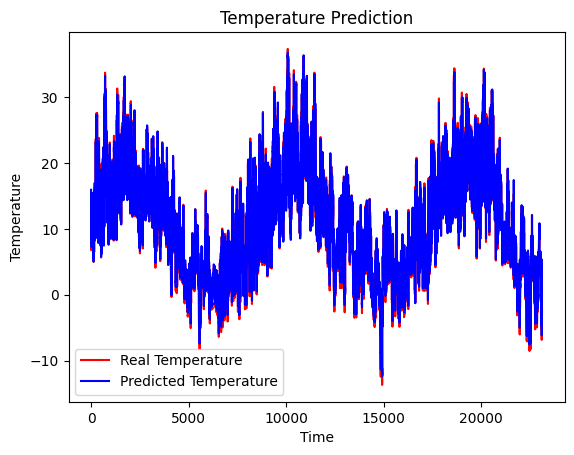

In [62]:
y_pred=model.predict(X_test)
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test.reshape(-1, 1))
plt.plot(y_test, color = 'red', label = 'Real Temperature')
plt.plot(y_pred, color = 'blue', label = 'Predicted Temperature')
plt.title('Temperature Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

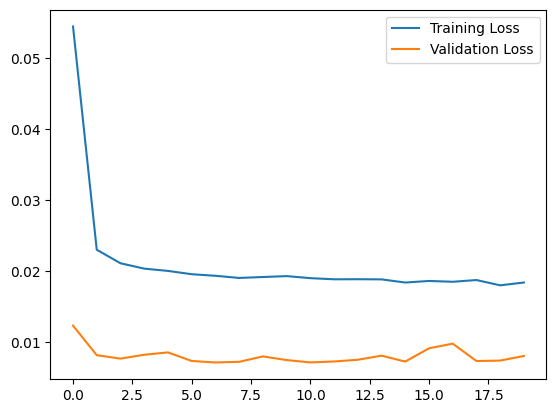

In [64]:
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()